# Entrenamiento YOLOv10 - Detección de Anomalías Dentales

## Presentado por:
- Natalia Moreno Montoya - 2230434
- Liseth Esmeralda Erazo Varela - 2231713
- Valentina Bueno Collazos - 2230556

## Descripción General
Este notebook implementa un modelo YOLOv10 para la detección automática de anomalías dentales en radiografías panorámicas. YOLOv10 es una versión optimizada de la familia YOLO que ofrece mejor rendimiento con menor latencia.


## Objetivos
- Entrenar un modelo YOLOv10n (nano) para detección de anomalías dentales
- Evaluar el rendimiento del modelo en un conjunto de validación
- Realizar predicciones en imágenes de prueba
- Visualizar resultados y métricas de detección

## Clases Detectadas
El modelo está entrenado para detectar las siguientes anomalías:
1. Cordal
2. Apiñamiento
3. Diente rotado
4. Diastema
5. Zona desdentada (dentula)
6. Tratamiento de conducto
7. Fractura
8. Caries
9. Enanismo radicular
10. Diente retenido
11. Resto radicular
12. Dientes sanos
13. Enanismo denticular
14. Diente supernumerario

## Estructura del Notebook
1. **Instalación de dependencias**: Instalación de ultralytics
2. **Importación de librerías**: Carga de módulos necesarios
3. **Descarga del dataset**: Clonación desde repositorio GitHub
4. **Entrenamiento del modelo**: Configuración y entrenamiento con YOLOv10n
5. **Validación**: Evaluación de métricas en conjunto de validación
6. **Predicciones**: Prueba del modelo en imágenes de test

## 1. Instalación de Dependencias

Se instala la biblioteca `ultralytics` que contiene la implementación de YOLOv10 y otras versiones de YOLO.

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00


## 2. Importación de Librerías

Se importan las librerías necesarias para:
- Manipulación de archivos y rutas
- Procesamiento de imágenes (OpenCV)
- Configuración del dataset (YAML)
- Visualización (Matplotlib)
- Modelo YOLO

In [ ]:
import glob
import os
import cv2
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO

## 3. Descarga del Dataset

Se descarga el dataset desde GitHub utilizando sparse checkout para obtener solo la carpeta `proyecto_IA_v2`:
- Contiene imágenes de radiografías dentales
- Incluye anotaciones en formato YOLO
- Dividido en train/val/test

In [ ]:
!mkdir tmp_repo && cd tmp_repo

!git init
!git remote add origin https://github.com/natam226/proyecto_IA.git
!git config core.sparseCheckout true

!echo "proyecto_IA_v2/" >> .git/info/sparse-checkout

!git pull origin main

!mv proyecto_IA_v2 /content/
!cd /content && rm -rf tmp_repo


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/proyecto_IA/.git/
/content/proyecto_IA
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 367 (delta 0), reused 6 (delta 0), pack-reused 361 (from 3)
Receiving objects: 100% (367/367), 397.26 MiB | 19.46 MiB/s, done.
From https://github.com/natam226/proyecto_IA
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
Updating files: 100% 

## 4. Carga del Modelo YOLOv10

Se carga el modelo pre-entrenado YOLOv10n:
- **YOLOv10n**: Versión nano, optimizada para velocidad
- Pre-entrenado en dataset COCO
- Se adapta automáticamente al número de clases del dataset personalizado

In [ ]:
model_2 = YOLO('yolov10n.pt')

## 5. Entrenamiento del Modelo

### Parámetros de Entrenamiento:
- **data**: Ruta al archivo YAML de configuración del dataset
- **epochs**: 50 épocas de entrenamiento
- **imgsz**: Tamaño de imagen 640x640 píxeles
- **batch**: 16 imágenes por lote
- **project**: Directorio para guardar resultados
- **name**: Nombre del experimento

El entrenamiento utiliza transfer learning desde el modelo pre-entrenado en COCO.

In [ ]:
model_2.train(
    data='/content/proyecto_IA_v2/data.yml',
    epochs=50,
    imgsz=640,
    batch=16,
    project='runs/yolov10_runs',
    name='exp_custom',
    exist_ok=False
)

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/proyecto_IA/proyecto_IA_v2/data.yml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_custom4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  2,  4,  5, 10, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c78050dde80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047

## 6. Métricas de Rendimiento

### Métricas Generales:
- **Overall Precision**: 0.5325 - De las detecciones realizadas, el 53.25% son correctas
- **Overall Recall**: 0.3024 - Se detecta el 30.24% de todas las anomalías presentes
- **Overall mAP50**: 0.2755 - Precisión promedio con IoU threshold de 0.5
- **Overall mAP50-95**: 0.1577 - Precisión promedio con IoU de 0.5 a 0.95
- **Model Fitness**: 0.1577

### Interpretación:
El modelo muestra una precisión moderada pero un recall bajo, lo que indica que detecta correctamente cuando hace predicciones, pero se pierden muchas anomalías reales.

In [18]:
# Access the metrics from the validation results
metrics = model_2.val()

print("Overall Model Metrics:")
print("======================")

# Overall metrics are available directly from the metrics.box object
overall_precision = metrics.box.p.mean()
overall_recall = metrics.box.r.mean()
overall_map50 = metrics.box.map50
overall_map = metrics.box.map
fitness = metrics.fitness

print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall mAP50: {overall_map50:.4f}")
print(f"Overall mAP50-95: {overall_map:.4f}")
print(f"Model Fitness: {fitness:.4f}")

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3089.8±688.1 MB/s, size: 2443.1 KB)
val: Scanning /content/proyecto_IA/proyecto_IA_v2/val/labels.cache... 9 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 10/10 14.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.6it/s 1.7s
                   all         10         45      0.532      0.302      0.276      0.158
                cordal          8         24      0.553      0.958      0.684      0.396
         diente_rotado          1          1          0          0          0          0
          zona_dentula          4          5       0.74      0.575      0.642      0.289
  tratamiento_conducto          6         12      0.434      0.583      0.354      0.242
       resto_radicular          1          1          1          0      0.249      0.176
    enanismo_radicular     

## 7. Predicciones en el Conjunto de Test

Se realizan predicciones en imágenes del conjunto de test:
- Se cargan 4 imágenes de muestra
- Se aplica el modelo con umbral de confianza de 0.25
- Se visualizan las detecciones con bounding boxes
- Se muestra el detalle de cada detección con su clase y nivel de confianza

Realizando predicciones en imágenes de test...



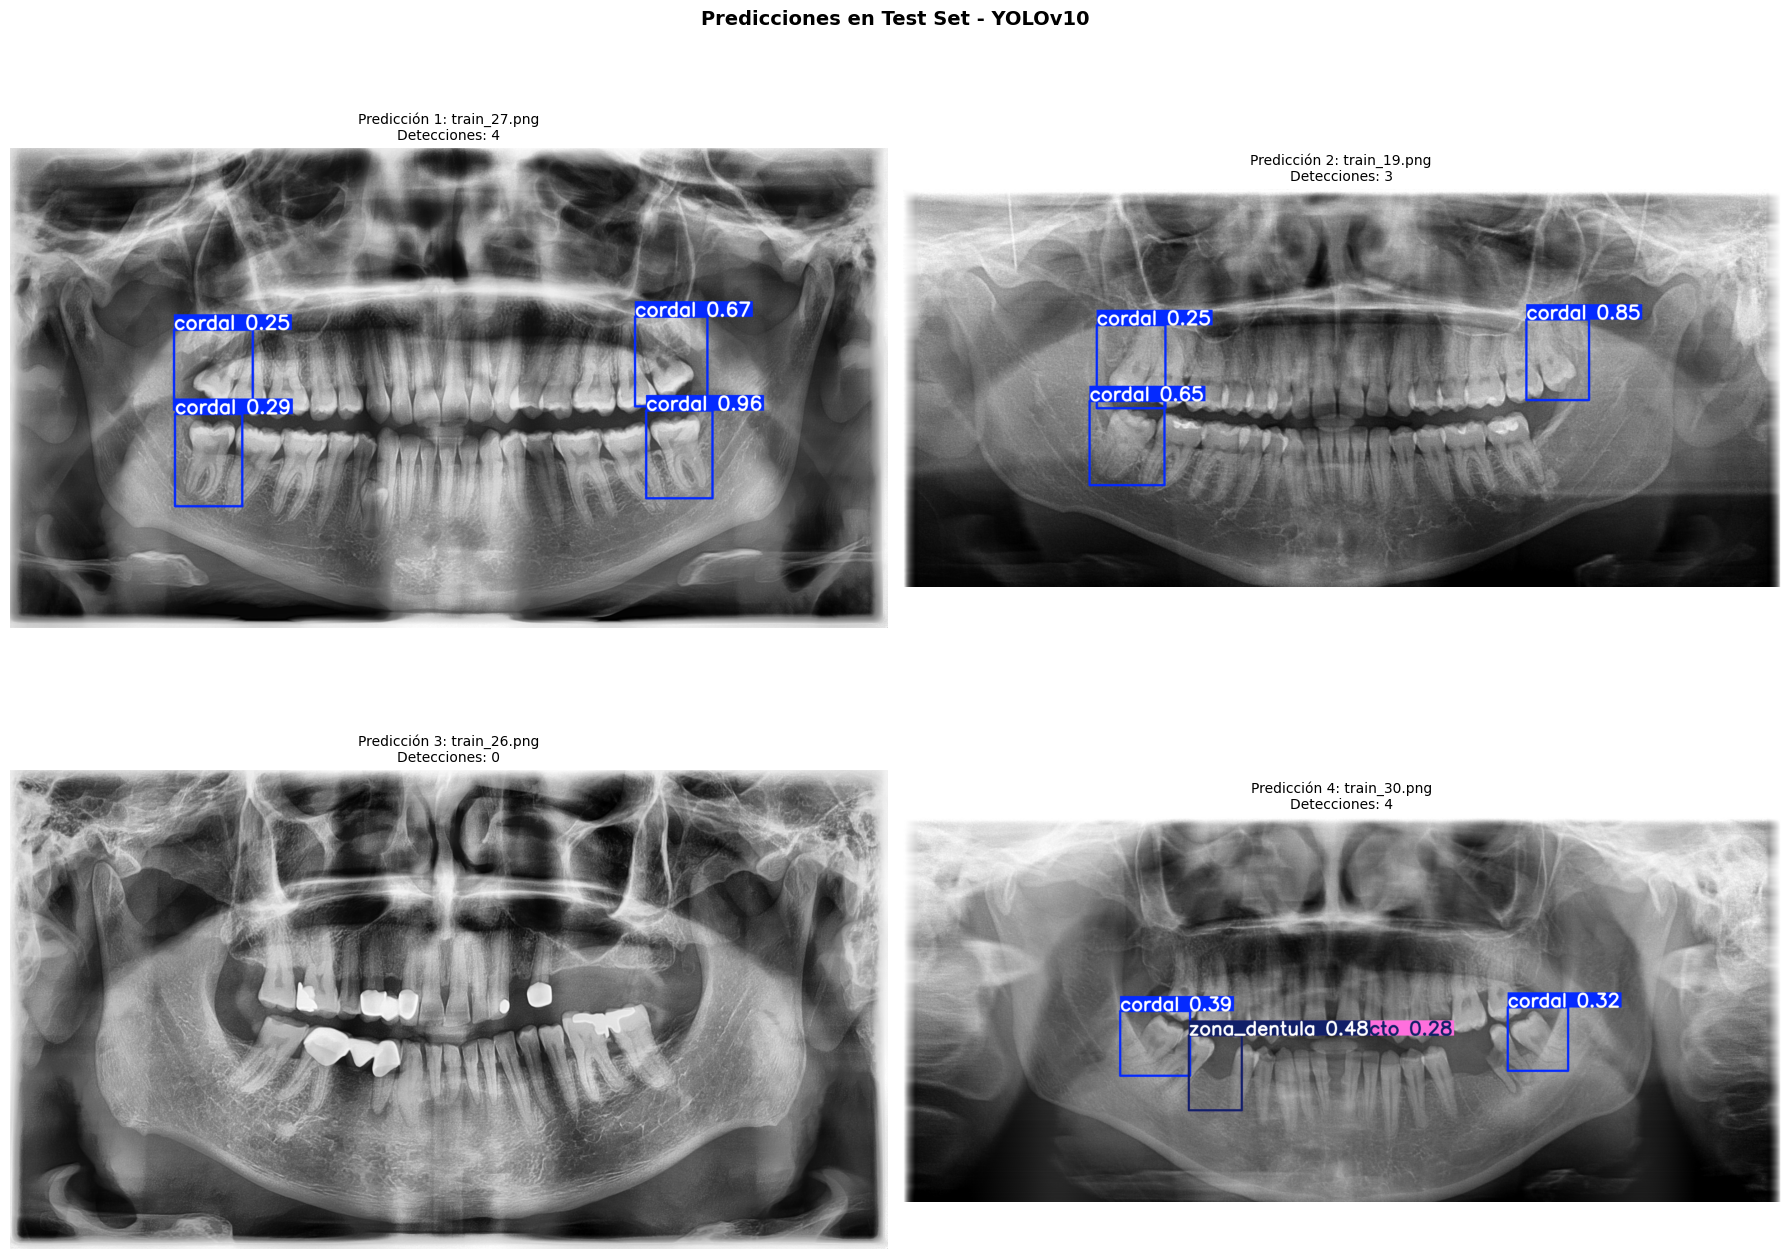


DETALLES DE DETECCIONES

Imagen 1: train_27.png
  Total de detecciones: 4
    1. cordal: 95.67% confianza
    2. cordal: 67.12% confianza
    3. cordal: 29.38% confianza
    4. cordal: 25.47% confianza

Imagen 2: train_19.png
  Total de detecciones: 3
    1. cordal: 85.31% confianza
    2. cordal: 65.40% confianza
    3. cordal: 25.05% confianza

Imagen 3: train_26.png
  Total de detecciones: 0
    (Sin detecciones)

Imagen 4: train_30.png
  Total de detecciones: 4
    1. zona_dentula: 48.13% confianza
    2. cordal: 38.98% confianza
    3. cordal: 31.52% confianza
    4. tratamiento_conducto: 27.70% confianza


In [ ]:
# Define the path to the test images
test_images_path = '/content/proyecto_IA_v2/test/images/'
test_images = list(glob.glob(os.path.join(test_images_path, '*.png')))

# Load data configuration
with open('/content/proyecto_IA_v2/data.yml', 'r') as f:
    data_config = yaml.safe_load(f)

# Hacer predicciones en imágenes de test
if len(test_images) > 0:
    print("Realizando predicciones en imágenes de test...\n")

    # Seleccionar algunas imágenes
    sample_images = test_images[:min(4, len(test_images))]

    # Predecir
    predictions = model_2.predict( # Changed model_best to model_2
        source=[str(img) for img in sample_images],
        conf=0.25, # Using default confidence
        iou=0.45, # Using default IoU
        imgsz=640, # Using default image size
        # device=CONFIG['device'], # Removed device as it's not defined in the notebook
        save=False,
        verbose=False
    )

    # Visualizar
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    axes = axes.flatten()

    for i, (pred, img_path) in enumerate(zip(predictions, sample_images)):
        # Obtener imagen con predicciones
        img_with_pred = pred.plot()  # Dibuja las predicciones
        img_with_pred = cv2.cvtColor(img_with_pred, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img_with_pred)
        axes[i].set_title(f'Predicción {i+1}: {os.path.basename(img_path)}\nDetecciones: {len(pred.boxes)}', fontsize=10) # Modified to use os.path.basename
        axes[i].axis('off')

    plt.suptitle('Predicciones en Test Set - YOLOv10', fontsize=14, fontweight='bold') # Changed YOLOv8 to YOLOv10
    plt.tight_layout()
    plt.show()

    # Mostrar detalles de detecciones
    print("\n" + "=" * 80)
    print("DETALLES DE DETECCIONES")
    print("=" * 80)
    for i, pred in enumerate(predictions):
        print(f"\nImagen {i+1}: {os.path.basename(sample_images[i])}") # Modified to use os.path.basename
        print(f"  Total de detecciones: {len(pred.boxes)}")

        if len(pred.boxes) > 0:
            for j, box in enumerate(pred.boxes):
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                cls_name = data_config['names'][cls_id]
                print(f"    {j+1}. {cls_name}: {conf:.2%} confianza")
        else:
            print("    (Sin detecciones)")
else:
    print("⚠️ No hay imágenes de test disponibles")